# <u><b>Objective: Predict when a particular cycle station will run out of bikes using time series analysis and machine learning</b></u>

## <u>Introduction:-</u>




## <u>Objective:-</u>
This study was undertaken by me on behalf of the bike sharing company. The objective,is to build a model which is able to predict if a particular station will run out of bikes within two hours. If the model is able to predict this with reasonalble accuracy, it is possible for the bike sharing company to replinish the station with more bikes.

If a station requires bikes, an alert message can be sent to a central command center which can then dispatch a truck/vehicle carrying more bikes to replenish the station which sent the alert.

Since there are a number of stations, the model has been built on the station with the highest traffic. It can then be applied to all the other stations as required. 

## <u>Data Set Information:-</u>

The data set includes the following files.

> Station.csv : Contains station information like name, location and number of docks available (70 rows)

> Status.csv: This is sensor data for every minute for each station. It shows the number of bikes available at the station at that minute (72 M records)

     > station_id
     > Bikes_available
     > Docks_available
     > Time
    
> trip.csv: Contains trip related information for each station (670K Rows)

     > ID
     > duration
     > start_date
     > end_date
     > start_station_id
     > end_station_id
     > bike_id
    
> weather.csv: Contains weather related data for each day for each zip code (3665 rows)
    
 The data set is quiet large (approximately 660MB), which is why its a good data set to experiment with pyspark. Because I have worked on a single machine instead of a cluster, I have used basic pyspark here to read and extract the data.
 
 <u><b>Remark on Data Quality:-</b></u>
 The data quality was generally good. However, the time stamps were inconsistent in a few places. The weather data also had some incorrect values in columns which were handled. 
 
 
 ## <u>Methodology</u>

### Objective and Approach

The objectve of this study is to build and analyze this time series data set and identify / build a parameter which will enable the bike sharing company to identify whether a station will need additional bikes before it runs out of bikes, leaving potential customers stranded or looking for other options. Then, we can use standard machine learning algorithms which are used to predict classification problems, to predict whether the station will need additional bikes or not. 

#### Approach

We begin by combining the data as the relevant information is present in a number of different data sets. The station table contains station information which acts as a key to identify station specific data from the status table and the trip table. 

##### Why just one station ?
Since the data set is a large one, and not all stations have similar traffic, we identifiy the one station where we can check our methodology. Eventually, we can apply the same methodology to other stations. 

Since every station has different amounts of traffic, I havent explored a strategy where all the station data is taken together, however this can be done if we have a cluster of machines or multiple nodes.

##### Building the  parameter which will be predicted
A parameter called <i>Replenish</i> is introduced. This parameter is set to 0 (which means that the station does not require additional bikes at them moment), based on the available number of bikes in the station. If the available number of bikes is less than 4, then the parameter is set to 1, which means that the station needs additional bikes. 

The parameter has been created by looking forward in time by 1 hour for our historic data set. If in the next one hour, the number of cycles available is less than or equal to 4, the flag is set as 1. If it is greater than 4, the flag is set as 0. This number (4 in our case) can be modified based on:-
1. Station and number of customers using the station
2. Traffic at that hour of day

Since we have historical data (and we can look forward an hour), and a practical application of this would probably be in real time data, the parameter will have to be built differently in that case. Some considerations are:-
1. Traffic volume for the time stamp based on historical values
2. Historic number of available bikes at the time stamp - also considering time/day/month - similar to our parameter


### Data Import and Cleaning

There were some issues with the time stamp formats in the data which have been handled in the below code
Apart from that, the data was relatively clean and did not require extensive manipulations.


### Exploratory Data Analysis using Data Vizualizations

Exploratory data analysis has been done by using the following packages:-
 - matplotlib for graphs and charts related to the predictive models
 - seaborn for exploratory data analysis
 
matplotlib has been used more extensively as seaborn resulted in slower rendering of the graphs because of the size of the dataset.

### Models 

Since I have structured this as a classification problem after time series analysis, I chose the following models.

 
#### *K-Nearest Neighbours*
   
#### *Decision Tree Classification*
   
#### *Random Forest*
   
   
### Model Evaluation

Model evaluation is done based on the following parameters:-

 - Accuracy
 - ROC curve
 - Precision
 - Recall
 
Accuracy of the models is important in this scenario along with precision and recall. Our aim is to minimize false positives (precision) and false negatives (recall) while also having a high accuracy. 

One key objective is to reduce the number of false negatives as much as possible. To achive this, different probability thresholds have been tried for different models. The best one is identified based on the the minimum number of false positives and false negatives. False positives can be tolerated (to an extent) because that would mean providing additional cycles to a station when they are not actually needed. However, a scenario where this happens is more acceptable than losing customers to other competitors in case our stations do not have cycles for the customers.

The focus is on false positives and false negatives, which makes precision and recall important. In order to identify the best model, the confusion matrix has been monitized and the model which gives us the highest revenue, is the best model. 
 
 ### Assumptions and Limitations
 
This is my first attempt at working on a relatively complex time series data set. In the past, I have seen time series data which have been analysed to identify trends and patterns. However, predictions with time series data is new. In order for the target variable to be available, we will have to forecast incoming and outgoing traffic which can be done fairly easily on a time series data set. Our target variable can then be used to predict where bicycles will be needed.

#### Assumptions

There are many assumptions in this case:-

1. The forecasts for the bycycle traffic need to be fairly accuate. This is possible with the data available to us. More data can possibly make it more accurate to figure it out.
2. The dock sensors, which identify whether a bicycle has been taken out of the dock are fairly accurate, fast (sending data instantaniously) and reliable (low failure or error rates)
3. For our model building, I have assumed the minimum number of bicycles which trigger the flag as 4. This number can be changed though.


#### Limitations

1. Our target variable depends on forecasts. If an unseen event or change in traffic effects the forecast, our target variable also gets effected.
2. There is much more data which can be gathered regarding the docs and customers or subscribers. This can help in building a better model but is not available to us. For example, if we have subscriber data, we can forecast with great accuracy which subscribers are likely to take a bike and this helps in traffic predition.


## <u>Conclusion and Client Recommendation</u>

As a consultant working with the client, my recommendation, based on the analysis would be to use the Random Forest model in order to most accurately predict the when the station will need replenishment of bicycles. This recommendation has been reached based on the different metrics used to measure model performance.

The Random Forest model results in the highest accuracy and the lowest false positive and false negative rates which we are trying to reduce.

The Random Forest model is also ideal for data sets with mixed features.

The model can be exposed as a web application in which similar data sets can be passed to obtain results however, the best way to use it would be to train any new data set.

I would recommend the client to use similar modelling for all the other station data available. This model would be best suitable for the stations with the highest traffic.

## <u>Future Research</u>

 - Including subscriber data along with dock status and traffic information
 - Combining all station data and running on a cluster(s)
 - Building a live dashboard based on the incoming data - or a dashboard based on available data



#### Application layer

 - An application can be built which can let us manipulate parameters (like bicycle threshold/ subscriber information/ special events - like holidays etc. ) 
 - The application layer will enable us to change the predictions on the go if we are able to base our prediction on a movable window of time.
 - An application layer which checks in real time the accuracy of our forecast and allows for changes to tweak it. 
 

#### Applications in other similar industries

- Apart from bike sharing, similar algorithms and methods can be used in other crowd-sharing scenarios like scooter sharing, equipment and services rentals, etc. 



In [1]:
#For timeseries analysis and dataframes
import pandas as pd
import datetime
#For Plots
import matplotlib.pyplot as plt
#Create Spark context
from pyspark.sql import SparkSession
#Importing Spark datatypes and SQL functions in order to create schema for tables
from pyspark.sql.types import *
from pyspark.sql.functions import *
import geopy.distance

spark = SparkSession.builder.appName('SFBikeShareProd').getOrCreate()

In [2]:
#Supervised learning models
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#kNN
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


#Model performance
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

#Hyper Parameter tuning
from sklearn.model_selection import GridSearchCV

#Math functions used for feature engineering
from math import log

#numpy
import numpy as np

### Importing data by specifying a schema and Cleaning Data
Below, we are importing the different tables along with their schemas. 
The tables imported for our initial analysis are"-

1. trip : contains trip details
2. station: station identification and location details
3. status: dock status at each station

When I imported the schema by specifying the timestamp fields in the initial load itself, I realised that the date fields were differently formatted for different time periods. The actual data begins from 2013-8-29 but when I imported the incorrect data, I get the following. The dataframe saves the dates starting from 2013-01-29. Also, it doesnt read the different date format which is why I thought that the dataset includes only one month data set from each year. 

In [3]:
##Importing dataset without fixing the date fields
##Importing CSV file directly using pyspark by specifying schema
trip_schema_corrected = StructType ([StructField ("id" , IntegerType(), True), StructField("duration", FloatType(), True),StructField("start_date", TimestampType(),True), StructField("start_station_name", StringType(), True), StructField("start_station_id", IntegerType(), True), StructField("end_date", TimestampType(),True), StructField("end_station_name", StringType(), True)\
									   , StructField("end_station_id", IntegerType(), True), StructField("bike_id", IntegerType(), True), StructField("subscription_type", StringType(), True), StructField("zip_code", StringType(), True)])
df_trip_2 = spark.read.load('D:/Data Sets/SF Bike Sharing Data/sf-bay-area-bike-share/trip.csv', format='csv', header='true',timestampFormat='mm/dd/yyyy hh:mm', schema=trip_schema_corrected)
df_trip_2.createOrReplaceTempView('trip_2')
df_trip_2.dtypes
df_trip_2.head(5)

[Row(id=4576, duration=63.0, start_date=datetime.datetime(2013, 1, 29, 14, 13), start_station_name='South Van Ness at Market', start_station_id=66, end_date=datetime.datetime(2013, 1, 29, 14, 14), end_station_name='South Van Ness at Market', end_station_id=66, bike_id=520, subscription_type='Subscriber', zip_code='94127'),
 Row(id=4607, duration=70.0, start_date=datetime.datetime(2013, 1, 29, 14, 42), start_station_name='San Jose City Hall', start_station_id=10, end_date=datetime.datetime(2013, 1, 29, 14, 43), end_station_name='San Jose City Hall', end_station_id=10, bike_id=661, subscription_type='Subscriber', zip_code='95138'),
 Row(id=4130, duration=71.0, start_date=datetime.datetime(2013, 1, 29, 10, 16), start_station_name='Mountain View City Hall', start_station_id=27, end_date=datetime.datetime(2013, 1, 29, 10, 17), end_station_name='Mountain View City Hall', end_station_id=27, bike_id=48, subscription_type='Subscriber', zip_code='97214'),
 Row(id=4251, duration=77.0, start_date=

The issue with the trip data set is that some of the dates are in the format '28-8-2013' whereas some other dates are in the format '23/8/2013'. In order to obtain correct dates, all '-' are replaced with '/'. 

In [4]:
##Importing dataset with the corrected date fields
trip_schema_2 = StructType ([StructField ("id" , IntegerType(), True), StructField("duration", FloatType(), True),StructField("start_date", StringType(),True), StructField("start_station_name", StringType(), True), StructField("start_station_id", IntegerType(), True), StructField("end_date", StringType(),True), StructField("end_station_name", StringType(), True)\
									   , StructField("end_station_id", IntegerType(), True), StructField("bike_id", IntegerType(), True), StructField("subscription_type", StringType(), True), StructField("zip_code", StringType(), True)])
df_trip_3 = spark.read.load('D:/Data Sets/SF Bike Sharing Data/sf-bay-area-bike-share/trip.csv', format='csv', header='true', schema=trip_schema_2)
df_trip_3.createOrReplaceTempView('trip_3')
##Correcting the date fields - replacing the '-' with '/' for consistency across all date fields
df_trip_3.withColumn('start_date', regexp_replace('start_date','-','/') )
df_trip_3.withColumn('end_date', regexp_replace('end_date','-','/') )
#Converting the start_date and end_date to timestamp. This SQL function doesnt work as seen below in the datatypes
df_trip_3.withColumn('start_date', to_timestamp('start_date', 'mm/dd/yyyy hh:mm'))
df_trip_3.withColumn('end_date', to_timestamp('end_date', 'mm/dd/yyyy hh:mm'))
df_trip_3.dtypes

[('id', 'int'),
 ('duration', 'float'),
 ('start_date', 'string'),
 ('start_station_name', 'string'),
 ('start_station_id', 'int'),
 ('end_date', 'string'),
 ('end_station_name', 'string'),
 ('end_station_id', 'int'),
 ('bike_id', 'int'),
 ('subscription_type', 'string'),
 ('zip_code', 'string')]

In [5]:
##Importing station data
#reading station data
station_schema =StructType([StructField("id", IntegerType(), True), StructField("name", StringType(), True), StructField("lat", FloatType(),True), StructField("long", FloatType(), True), StructField("dock_count", IntegerType(),True),  StructField("city",StringType(), True), StructField("installation_date",DateType(), True)])
df_station = spark.read.load('D:/Data Sets/SF Bike Sharing Data/sf-bay-area-bike-share/station.csv', format='csv', header='true', schema=station_schema)
df_station.createOrReplaceTempView('station')

For initial analysis, I am considering the station data of only one station. Station with id = 70. 
This is bacuase the volume of data is large. Also, station 70 has the highest volume of trips when compared to all other stations which makes it a good case for analyzing the data. 

Since the objective of my analysis is limited to individual stations, I am considering one station at a time. Any exploratory analysis done here, can also be applied to all the other stations. 

In [6]:
#Combining trip and station data. We are getting the number of cycles available for the station and latitude and longitude information of destination stations
station_70_detailed = spark.sql('select a.id, (a.duration/60) as trip_duration, a.start_station_name, a.start_date, a.start_station_id, b.lat, b.long, a.end_date, a.end_station_id, a.bike_id, a.subscription_type, a.zip_code, b.city, b.dock_count from trip_3 a LEFT OUTER JOIN station b ON a.start_station_id = b.id WHERE a.start_station_id = 70')
station_70_detailed.collect()
station_70_detailed.createOrReplaceTempView('iter_1')
#Joining the data together
station_70_detailed_2 = spark.sql('select a.id, a.trip_duration,a.start_station_name, a.start_date, a.start_station_id, a.lat, a.long, a.end_date, a.end_station_id, b.lat as lat_end, b.long as long_end,  a.bike_id, a.subscription_type, a.zip_code, a.city, a.dock_count from iter_1 a LEFT OUTER JOIN station b ON a.end_station_id = b.id')
station_70_detailed_2.show(5)

+----+------------------+--------------------+---------------+----------------+---------+----------+---------------+--------------+---------+----------+-------+-----------------+--------+-------------+----------+
|  id|     trip_duration|  start_station_name|     start_date|start_station_id|      lat|      long|       end_date|end_station_id|  lat_end|  long_end|bike_id|subscription_type|zip_code|         city|dock_count|
+----+------------------+--------------------+---------------+----------------+---------+----------+---------------+--------------+---------+----------+-------+-----------------+--------+-------------+----------+
|4673|3.9833333333333334|San Francisco Cal...|8/29/2013 15:48|              70|37.776615|-122.39526|8/29/2013 15:52|            65|37.771057|-122.40272|    568|       Subscriber|   94110|San Francisco|        19|
|4177| 4.633333333333334|San Francisco Cal...|8/29/2013 11:03|              70|37.776615|-122.39526|8/29/2013 11:08|            64| 37.78226|-122.39

### Helper Methods

#### Calculating the distance between two points given latitude and longitude.

In [7]:
#Calculates distance between two points given coordinates
def calcDistance(x):
    coords_1 = (x[0], x[1])
    coords_2 = (x[2], x[3])
    return geopy.distance.vincenty(coords_1, coords_2).km

In [8]:
# Functions to Calculating the outgoing and incoming bikes
def outgoing(row, station_id):
    if row['start_station_id'] == station_id:
        return 1
    if row['end_station_id'] == station_id:
        return 0

def incoming(row, station_id):
     if row['start_station_id'] == station_id:
        return 0
     if row['end_station_id'] == station_id:
        return 1    

In [9]:
#Threshold function: this 
def threshold(row):
    if row['bikes_available'] < 4:
        return 1
    if row['bikes_available'] >=0:
        return 0

### Initial Exploratory Analysis of the data

<function matplotlib.pyplot.show(*args, **kw)>

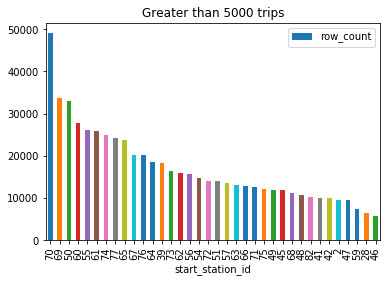

<Figure size 2520x2520 with 0 Axes>

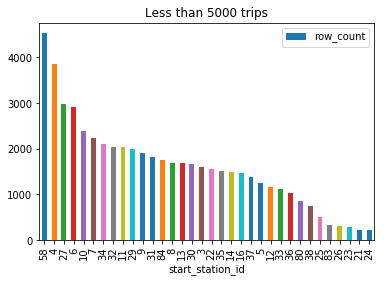

<Figure size 2520x2520 with 0 Axes>

In [10]:
#Number of trips from each station
trip_count=spark.sql('select start_station_id,count(*) as row_count from trip_3 group by start_station_id order by count(*) desc')
pd_trip_count = trip_count.toPandas()

#getting trip counts by station
pd_trip_count.count()
pd_trip_count_max = pd_trip_count.loc[pd_trip_count['row_count']>5000]
pd_trip_count_min = pd_trip_count.loc[pd_trip_count['row_count']<5000]

#Number of trips from the top stations
pd_trip_count_max.plot.bar(grid=False, x='start_station_id', y='row_count', title='Greater than 5000 trips')
plt.figure(figsize=(35,35))

#Number of trips from the bottom stations
pd_trip_count_min.plot.bar(grid=False, x='start_station_id', y='row_count', title='Less than 5000 trips')
plt.figure(figsize=(35,35))

plt.show

As we can see, station 70 has the most number of trips amongst all available station data and should be a good dataset for our model.

In [11]:
#Customer makeup - Subscriber vs One-time customer
subscriber_type_trips=spark.sql('select subscription_type,count(*) as trip_count from trip_3 group by subscription_type order by count(*) desc')
pd_subscr_type_trips = subscriber_type_trips.toPandas()

                   trip_count
subscription_type            
Subscriber             566746
Customer               103213


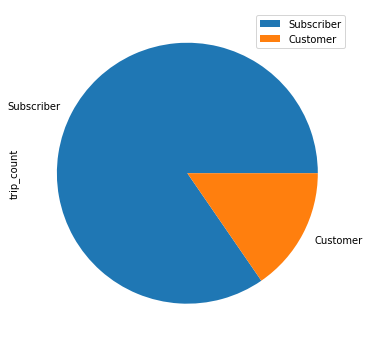

In [12]:
#Customer makeup - Subscriber vs One-time customer
pd_subscriber_type_trips = pd_subscr_type_trips.set_index(['subscription_type'])
print(pd_subscriber_type_trips)
pd_subscriber_type_trips.plot.pie(y='trip_count', figsize=(6,6))
plt.show()

The one-time customer and subscriber makeup is represented above. Most of the users are subscribers of the service. 
If we had more data regarding the customers then we could have analysed it or used it in our feature building but since we do not have it, this just serves exploratory analysis purposes. 

### Time series exploratory analysis using pandas - Station 70

1. Trip Durations for each year
2. Trip Lengths for each year/month
3. Average trip lengths by month/week
2. Number of trips by month 

In [13]:
## Time series - analyzing data from one station
pd_station_70 = station_70_detailed_2.toPandas()
pd_station_70['start_date'] = pd.to_datetime(pd_station_70['start_date'])
pd_station_70['end_date'] = pd.to_datetime(pd_station_70['end_date'])
#Setting start_date as index
pd_station_70.set_index('start_date', inplace=True)

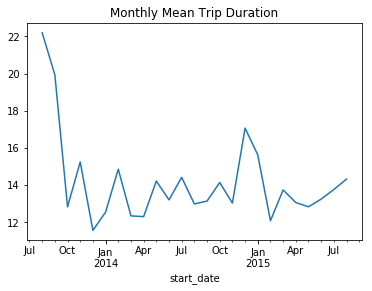

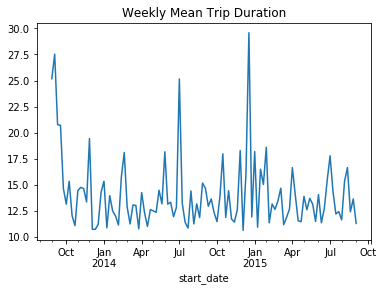

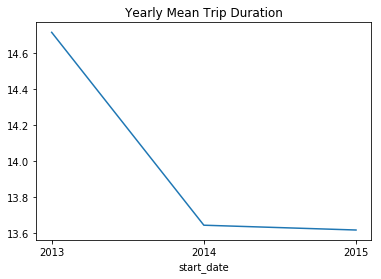

In [14]:
#Converting seconds to minutes
#pd_station_70['dur_min'] = round(pd_station_70['duration']/60,1)

#General time series on duration
#pd_station_70.trip_duration.plot(figsize=(20,20))
pd_station_70.trip_duration.resample('M').mean().plot(title = 'Monthly Mean Trip Duration')
plt.show()

pd_station_70.trip_duration.resample('W').mean().plot(title = 'Weekly Mean Trip Duration')
plt.show()

pd_station_70.trip_duration.resample('Y').mean().plot(title = 'Yearly Mean Trip Duration')
plt.show()

In [15]:
#Calculating the trip lengths
pd_station_70['distance'] = pd_station_70[['lat', 'long', 'lat_end', 'long_end']].apply(calcDistance, axis=1)

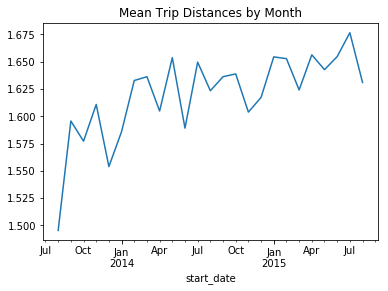

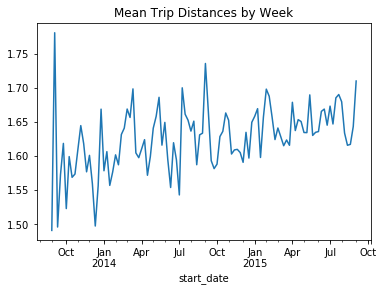

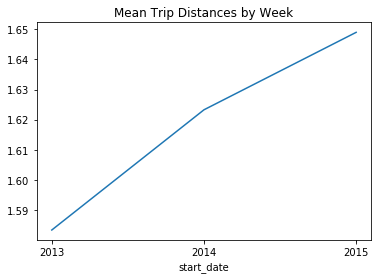

In [16]:
#Plotting mean trip distances
pd_station_70.distance.resample('M').mean().plot(title='Mean Trip Distances by Month')
plt.show()

pd_station_70.distance.resample('W').mean().plot(title='Mean Trip Distances by Week')
plt.show()

pd_station_70.distance.resample('Y').mean().plot(title='Mean Trip Distances by Week')
plt.show()

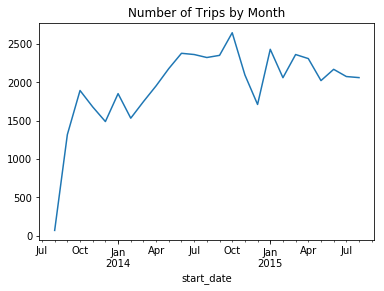

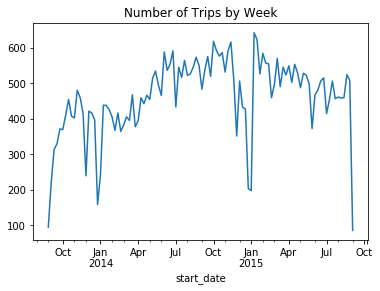

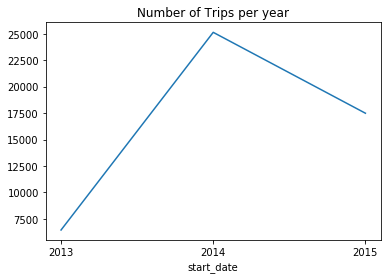

In [17]:
#Total Number of Trips per month
pd_station_70.id.resample('M').count().plot(title='Number of Trips by Month')
plt.show()
pd_station_70.id.resample('W').count().plot(title='Number of Trips by Week')
plt.show()
pd_station_70.id.resample('Y').count().plot(title='Number of Trips per year')
plt.show()

## Data Manipulation for Model Development

Since we are going to predict when a station will need additional bikes, we will primiraly be looking at the incoming and outgoing bikes in the station. We will build features based on incoming and outgoing bikes as well as other features like mean incoming and outgoing traffic based on the day of the week, time of the day, past 24 hrs etc. 

In [18]:
pd_station_70['trip_count'] = 1
#pd_station_70 = pd_station_70['trip_count'].resample('m').sum()

In [19]:
#Getting all trip data for station 70 
# 'All' means trips coming into station 70 and trips going out of station 70
station_70_all = spark.sql('select * from trip_3 where start_station_id = 70 OR end_station_id = 70')
station_70_all.createOrReplaceTempView('stat70_all')
station_70_all_details = spark.sql('select a.id, (a.duration/60) as trip_duration, a.start_station_name, a.start_date, a.start_station_id, b.lat, b.long, a.end_date, a.end_station_id, a.bike_id, a.subscription_type, a.zip_code, b.city, b.dock_count from stat70_all a LEFT OUTER JOIN station b ON a.start_station_id = b.id')
station_70_all_details.collect()
station_70_all_details.createOrReplaceTempView('iter_3')

station_70_all_details_final = spark.sql('select a.id, a.trip_duration,a.start_station_name, a.start_date, a.start_station_id, a.lat, a.long, a.end_date, a.end_station_id, b.lat as lat_end, b.long as long_end,  a.bike_id, a.subscription_type, a.zip_code, a.city, a.dock_count as start_stat_dock_count, b.dock_count as end_stat_dock_count from iter_3 a LEFT OUTER JOIN station b ON a.end_station_id = b.id')
station_70_all_details_final.show(5)


+----+------------------+--------------------+---------------+----------------+---------+----------+---------------+--------------+---------+----------+-------+-----------------+--------+-------------+---------------------+-------------------+
|  id|     trip_duration|  start_station_name|     start_date|start_station_id|      lat|      long|       end_date|end_station_id|  lat_end|  long_end|bike_id|subscription_type|zip_code|         city|start_stat_dock_count|end_stat_dock_count|
+----+------------------+--------------------+---------------+----------------+---------+----------+---------------+--------------+---------+----------+-------+-----------------+--------+-------------+---------------------+-------------------+
|4673|3.9833333333333334|San Francisco Cal...|8/29/2013 15:48|              70|37.776615|-122.39526|8/29/2013 15:52|            65|37.771057|-122.40272|    568|       Subscriber|   94110|San Francisco|                   19|                 15|
|5105| 4.083333333333333

In [20]:
#Converting to pandas df for easier time series analysis
pd_station_70_all = station_70_all_details_final.toPandas()

In [21]:
#Setting time stamps and index
pd_station_70_all['start_date'] = pd.to_datetime(pd_station_70_all['start_date'])
pd_station_70_all['end_date'] = pd.to_datetime(pd_station_70_all['end_date'])
#setting start time as index for new dataframe
pd_station_70_all.set_index('start_date', inplace=True)
pd_station_70_all = pd_station_70_all.sort_index()

### Feature Building

In [22]:
#Cycle availability - based on incoming and outgoing trip
cycle_count = 19
cycle_availability = []

for x in pd_station_70_all['start_station_id']:
    if x == 70:
        cycle_availability.append(cycle_count-1)
        cycle_count = cycle_count-1
    elif x!=70:
        cycle_availability.append(cycle_count+1)
        cycle_count = cycle_count + 1

pd_station_70_all['cycles_available']= cycle_availability        


In [23]:
#Adding outgoing and incoming columns to the data set
pd_station_70_all['outgoing'] = pd_station_70_all.apply(lambda row: outgoing(row, 70), axis=1)
pd_station_70_all['incoming'] = pd_station_70_all.apply(lambda row: incoming(row, 70), axis=1)

In [24]:
pd_station_70_all.head(5)

,id,trip_duration,start_station_name,start_station_id,lat,long,end_date,end_station_id,lat_end,long_end,bike_id,subscription_type,zip_code,city,start_stat_dock_count,end_stat_dock_count,cycles_available,outgoing,incoming
start_date,,,,,,,,,,,,,,,,,,,
2013-08-29 11:03:00,4177,4.633333,San Francisco Caltrain (Townsend at 4th),70,37.776615,-122.395264,2013-08-29 11:08:00,64,37.782261,-122.392738,371,Subscriber,94117,San Francisco,19,15,18,1,0
2013-08-29 11:17:00,4218,26.550000,San Francisco Caltrain (Townsend at 4th),70,37.776615,-122.395264,2013-08-29 11:43:00,66,37.774815,-122.418953,377,Subscriber,94114,San Francisco,19,19,17,1,0
2013-08-29 11:17:00,4217,25.583333,San Francisco Caltrain (Townsend at 4th),70,37.776615,-122.395264,2013-08-29 11:42:00,66,37.774815,-122.418953,370,Subscriber,94703,San Francisco,19,19,16,1,0
2013-08-29 11:18:00,4221,25.000000,San Francisco Caltrain (Townsend at 4th),70,37.776615,-122.395264,2013-08-29 11:43:00,66,37.774815,-122.418953,546,Subscriber,94123,San Francisco,19,19,15,1,0
2013-08-29 11:18:00,4219,19.166667,San Francisco Caltrain (Townsend at 4th),70,37.776615,-122.395264,2013-08-29 11:37:00,72,37.781040,-122.411751,597,Subscriber,97214,San Francisco,19,23,14,1,0


#### Combining trip data with cycle dock status

Below we are combining trip data with cycle dock status. We have resampled the data to 30 minutes and calculating the number of incoming and outgoing trips in those 30 minutes. 

This resampled data is then joined with dock status data which is also resampled for 30 minutes. 

In [25]:
##resampling data hourly
#saving to two series: Outgoing cycles per hour 
outgoing_per_hour = pd_station_70_all['outgoing'].resample('30T', label='left').sum()
#Incoming Cycles per Hour
incoming_per_hour = pd_station_70_all['incoming'].resample('30T', label='left').sum()

In [26]:
#Reading the status table which contains dock availability data
dockstatus_df = spark.read.load('D:\Data Sets\SF Bike Sharing Data\sf-bay-area-bike-share/status.csv', format='csv', header='true',timestampFormat='mm/dd/yyyy hh:mm')
dockstatus_df.createOrReplaceTempView('status')
#Getting the status of just station 70
dock_status_70 = spark.sql( 'select * from status where station_id = 70')
#converting dataframe to pandas
p_df_dock_status_70 = dock_status_70.toPandas()
#Setting timestamp as index after converting datatype
p_df_dock_status_70['time'] = pd.to_datetime(p_df_dock_status_70['time'])
p_df_dock_status_70.set_index('time', inplace=True)
p_df_dock_status_70.sort_index()

,station_id,bikes_available,docks_available
time,,,
2013-08-29 12:06:01,70,0,19
2013-08-29 12:07:01,70,0,19
2013-08-29 12:08:01,70,0,19
2013-08-29 12:09:01,70,0,19
2013-08-29 12:10:01,70,0,19
2013-08-29 12:11:01,70,0,19
2013-08-29 12:12:01,70,0,19
2013-08-29 12:13:01,70,0,19
2013-08-29 12:15:01,70,0,19


In [27]:
#Resampling Dock Status for every 30 mins 
#Doing this because the status table is for every minute
p_df_new_dockStatus = p_df_dock_status_70.resample('30T', label='left').last()

In [28]:
#Joining the dock status with outgoing and incoming data calculated earlier
#This will be our main data set and we will build more features on this set
data_frames = [p_df_new_dockStatus,outgoing_per_hour, incoming_per_hour]
bike_availability_df = pd.concat(data_frames, join = 'inner', axis=1, join_axes=[p_df_new_dockStatus.index])

#### Target Variable: Replenish

The 'Replenish' column is a binary column with values set as 0 and 1

1: Dock needs additional bikes
0: Dock does not need additional bikes

We also have a threshold value. The threshold value specifies the minimum number of available bikes a station should have before the Replenish flag is triggered. The replenish flag is set if the number of cycles falls below this threshold flag.

In [29]:
#converting string to a numeric variable
bike_availability_df['bikes_available'] = pd.to_numeric(bike_availability_df['bikes_available'] )
bike_availability_df['station_id'] = pd.to_numeric(bike_availability_df['station_id'])
bike_availability_df['docks_available'] = pd.to_numeric(bike_availability_df['docks_available'])
bike_availability_df.dtypes

station_id         float64
bikes_available    float64
docks_available    float64
outgoing           float64
incoming           float64
dtype: object

In [30]:
#Setting the threshold
bikeThreshold = 4
#Setting target column - starting with 0
bike_availability_df['replenish'] = 0
# setting value based on the future 1 Hour
#So, if the number of bikes at (current_time_stamp + 1 Hour) is less than 4, then set the 'replenish' flag as 1 else 0
#selected the time stamps to ignore the last one hour (as it doesnt have any future values to look into).
for i in bike_availability_df.loc['2013-08-29 12:00:00':'2015-08-31 22:30:00'].index:
    if bike_availability_df.loc[(i + 2),'bikes_available'] < bikeThreshold:
        bike_availability_df.loc[i,'replenish'] = 1
    if bike_availability_df.loc[(i + 2),'bikes_available'] >= bikeThreshold:
        bike_availability_df.loc[i,'replenish'] = 0

In [31]:
#Printing head to check replenish value
bike_availability_df.head(10)

,station_id,bikes_available,docks_available,outgoing,incoming,replenish
time,,,,,,
2013-08-29 12:00:00,70.0,2.0,17.0,0.0,1.0,1
2013-08-29 12:30:00,70.0,2.0,17.0,0.0,0.0,0
2013-08-29 13:00:00,70.0,3.0,16.0,0.0,2.0,0
2013-08-29 13:30:00,70.0,5.0,14.0,1.0,2.0,0
2013-08-29 14:00:00,70.0,5.0,14.0,0.0,2.0,0
2013-08-29 14:30:00,70.0,5.0,14.0,1.0,0.0,0
2013-08-29 15:00:00,70.0,6.0,13.0,2.0,5.0,0
2013-08-29 15:30:00,70.0,8.0,11.0,1.0,3.0,0
2013-08-29 16:00:00,70.0,8.0,11.0,5.0,2.0,0


In [32]:
#New features:- 
#24 Hr Rolling mean for outgoing bikes
#24 Hr Rolling mean for incoming bikes
#ratioo of incoming and outgoing averages
bike_availability_df['outgoing_24H'] = bike_availability_df['outgoing'].rolling(window=48).mean()
bike_availability_df['incoming_24H'] = bike_availability_df['incoming'].rolling(window=48).mean()
bike_availability_df['outgoing-incoming-ratio'] = bike_availability_df['outgoing_24H']/bike_availability_df['incoming_24H']

bike_availability_df.loc[~np.isfinite(bike_availability_df['outgoing-incoming-ratio']), 'outgoing-incoming-ratio'] = 0
##Backfill NaNs with outgoing and incoming ratios

In [33]:
#Average bikes available in 3 hour windows to calculate periods of high traffic and low traffic
bike_availability_df['avg_bikes_available'] = bike_availability_df['bikes_available'].rolling(window=6).mean()
bike_availability_df['net_incoming_traffic'] = bike_availability_df['incoming'] - bike_availability_df['outgoing']
bike_availability_df['net_incoming_traffic_24Hr']  =  bike_availability_df['net_incoming_traffic'].rolling(window=48).mean()
bike_availability_df['incoming_traffic_hourVsDay']  = bike_availability_df['net_incoming_traffic'] / bike_availability_df['net_incoming_traffic_24Hr'] 
bike_availability_df.loc[~np.isfinite(bike_availability_df['incoming_traffic_hourVsDay']), 'incoming_traffic_hourVsDay'] = 0
#bike_availability_df['net_outgoing_traffic'] = bike_availability_df['outgoing'] - bike_availability_df['incoming']

#Backfill Nans

In [34]:
#getting the day of the week
bike_availability_df['day_of_week'] = bike_availability_df.index.dayofweek


Some more ideas for features:-
1. Get weekday averages for net incoming traffic - all Monday averages for that hour, all Tuesday averages for that hour, all Wednesday averages for that hour
2. Append to data  - match with weekday and hour - cumilative net incoming for that hour and weekday
3. Find ratio of net incoming at that hour and cumilative

Find Busy Hours in a day


#### Understanding the traffic
Does the weekday have an impact on the traffic? 
We can find this out by taking a mean of the net-incoming traffic for all the days in the week, across the data set. 

We can look at it in more detail by looking at hourly data.

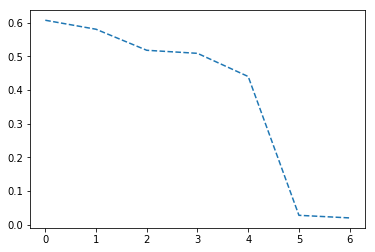

In [35]:
#incoming traffic by weekday
net_incoming_byDay = bike_availability_df.net_incoming_traffic.groupby(bike_availability_df.index.dayofweek).mean()
net_incoming_byDay.index = [0,1,2,3,4,5,6]
net_incoming_byDay.plot(style='--')
plt.show()

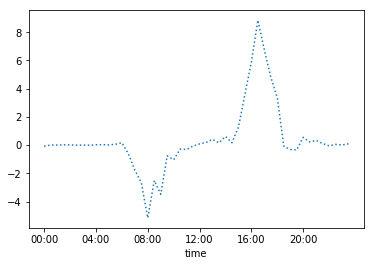

In [36]:
#incoming traffic by hour
net_incoming_byHour = bike_availability_df.net_incoming_traffic.groupby(bike_availability_df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
net_incoming_byHour.plot(xticks=hourly_ticks, style=':')
plt.show()

As we can see above, the net incoming traffic falls in the mornings. Which means that the total number of bikes outgoing is greater than the total number of bikes incoming. It slowly goes aboove zero till it suddenly peaks between 4.00 Pm and 6.00 PM which suggests a greater number of incoming bikes then outgoing bikes. 

The graph also suggests that station 70 could be an urban residential with businesses as-well as there is significant incoming traffic in the mornings. 

00:00:00   -0.079235
00:30:00    0.010929
01:00:00    0.009563
01:30:00    0.023224
02:00:00    0.016393
02:30:00    0.002732
03:00:00    0.004098
03:30:00   -0.004098
04:00:00    0.027322
04:30:00    0.031421
05:00:00    0.020492
05:30:00    0.060109
06:00:00    0.174863
06:30:00   -0.609290
07:00:00   -1.769126
07:30:00   -2.658470
08:00:00   -5.155738
08:30:00   -2.504098
09:00:00   -3.482240
09:30:00   -0.759563
10:00:00   -1.036885
10:30:00   -0.278689
11:00:00   -0.304645
11:30:00   -0.066940
12:00:00    0.088677
12:30:00    0.190996
13:00:00    0.407913
13:30:00    0.163711
14:00:00    0.615280
14:30:00    0.169168
15:00:00    1.266030
15:30:00    3.611187
16:00:00    5.897681
16:30:00    8.849932
17:00:00    6.753070
17:30:00    4.810368
18:00:00    3.361528
18:30:00   -0.073670
19:00:00   -0.306958
19:30:00   -0.336971
20:00:00    0.552524
20:30:00    0.225102
21:00:00    0.338336
21:30:00    0.113233
22:00:00   -0.049113
22:30:00    0.053206
23:00:00    0.010914
23:30:00    0

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


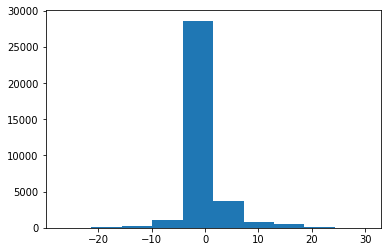

In [37]:
print(net_incoming_byHour)
plt.hist(bike_availability_df.net_incoming_traffic)
plt.show()

In [38]:
bike_availability_df['timestamp'] = bike_availability_df.index.time

In [39]:
#Mapping net_incoming average by weekday and by hour to source data set
def mapNetIncoming_byTime (row): 
    for x in net_incoming_byHour.index:       
        if row == x:
            return net_incoming_byHour[x]

def mapNetIncoming_byWeekDay (row):
    for x in net_incoming_byDay.index:
        if row == x:
            return net_incoming_byDay[x]
        

In [40]:
bike_availability_df['net_incoming_overall_by_hour'] = bike_availability_df['timestamp'].apply(lambda row: mapNetIncoming_byTime(row))
bike_availability_df['net_incoming_overall_by_weekday'] = bike_availability_df['day_of_week'].apply(lambda row: mapNetIncoming_byWeekDay(row))

In [41]:
#Getting the ratio of net_incoming_traffic in the 24 hour window AND the net incoming traffic mean for the specific weekday
bike_availability_df['net_incoming_traffic_ratio_1'] = bike_availability_df['net_incoming_traffic_24Hr']/bike_availability_df['net_incoming_overall_by_weekday']
#handling division by zero
bike_availability_df.loc[~np.isfinite(bike_availability_df['net_incoming_traffic_ratio_1']), 'net_incoming_traffic_ratio_1'] = 0
bike_availability_df['net_incoming_traffic_ratio_2'] = bike_availability_df['net_incoming_traffic']/bike_availability_df['net_incoming_overall_by_hour']
#handling division by zero
bike_availability_df.loc[~np.isfinite(bike_availability_df['net_incoming_traffic_ratio_2']), 'net_incoming_traffic_ratio_2'] = 0

In [42]:
#Additional fields : Total Traffic:-
#total incoming + outgoing
bike_availability_df['total_incoming_outgoing'] = bike_availability_df['outgoing']+bike_availability_df['incoming']
bike_availability_df['total_incoming_outgoing_24Hr']  =  bike_availability_df['total_incoming_outgoing'].rolling(window=48).mean()
bike_availability_df['total_traffic_hourVsDay']  = bike_availability_df['total_incoming_outgoing'] / bike_availability_df['total_incoming_outgoing_24Hr'] 

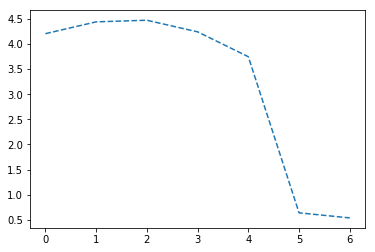

In [43]:
#total traffic by weekday
total_byDay = bike_availability_df.total_incoming_outgoing.groupby(bike_availability_df.index.dayofweek).mean()
total_byDay.index = [0,1,2,3,4,5,6]
total_byDay.plot(style='--')
plt.show()

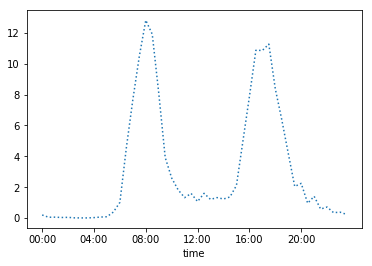

In [44]:
#total traffic by hour
total_byHour = bike_availability_df.total_incoming_outgoing.groupby(bike_availability_df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
total_byHour.plot(xticks=hourly_ticks, style=':')
plt.show()

In [45]:
total_traffic = pd.DataFrame(index = bike_availability_df.index)
total_traffic['total_incoming_outgoing'] = bike_availability_df['total_incoming_outgoing']

total_byHour_WeekDay = total_traffic.pivot_table(index = total_traffic.index.time, columns =total_traffic.index.dayofweek, aggfunc = np.mean )

In [46]:
total_byHour_WeekDay

total_incoming_outgoing                                              \
time                           0          1          2          3          4   
00:00:00                0.076190   0.250000   0.201923   0.192308   0.200000   
00:30:00                0.038095   0.019231   0.057692   0.038462   0.057143   
01:00:00                0.019048   0.048077   0.038462   0.076923   0.009524   
01:30:00                0.019048   0.009615   0.048077   0.019231   0.038095   
02:00:00                0.076190   0.019231   0.019231   0.038462   0.019048   
02:30:00                0.038095   0.000000   0.000000   0.019231   0.000000   
03:00:00                0.019048   0.009615   0.000000   0.000000   0.000000   
03:30:00                0.019048   0.019231   0.000000   0.019231   0.019048   
04:00:00                0.057143   0.048077   0.028846   0.028846   0.019048   
04:30:00                0.085714   0.105769   0.134615   0.086538   0.038095   
05:00:00                0.142857   0.076923   0.134615   0.125000   0.114286   
05:30:00                0.476190   0.634615   0.615385   0.528846   0.438095   
06:00:00                1.228571   1.721154   1.663462   1.192308   1.276190   
06:30:00                6.457143   7.105769   6.423077   6.028846   5.771429   
07:00:00               10.971429  12.365385  10.663462  10.951923   8.561905   
07:30:00               14.133333  16.000000  15.019231  15.067308  12.647619   
08:00:00               15.952381  18.961538  19.173077  18.701923  16.533333   
08:30:00               16.028571  16.134615  17.932692  17.317308  15.161905   
09:00:00               10.619048  10.807692  12.644231  11.230769  10.333333   
09:30:00                4.780952   5.442308   5.865385   4.951923   4.476190   
10:00:00                3.180952   3.615385   3.432692   3.365385   3.180952   
10:30:00                2.038095   2.048077   1.980769   2.115385   2.161905   
11:00:00                1.161905   1.576923   1.423077   1.490385   1.428571   
11:30:00                1.257143   1.394231   1.644231   1.663462   1.685714   
12:00:00                1.000000   1.076923   0.894231   1.028571   1.009524   
12:30:00                1.276190   1.653846   1.769231   1.961905   1.847619   
13:00:00                1.180952   1.336538   1.240385   1.561905   1.104762   
13:30:00                0.980952   1.115385   1.336538   1.476190   1.790476   
14:00:00                1.104762   1.394231   1.278846   1.200000   1.590476   
14:30:00                1.133333   1.211538   1.365385   1.457143   1.790476   
15:00:00                2.171429   2.807692   2.211538   2.590476   3.114286   
15:30:00                6.704762   6.557692   6.346154   6.171429   6.504762   
16:00:00               10.028571  10.586538  11.538462  10.228571  10.733333   
16:30:00               15.514286  15.269231  14.903846  14.380952  13.380952   
17:00:00               16.390476  14.826923  15.403846  14.142857  13.257143   
17:30:00               17.219048  15.701923  15.961538  15.095238  12.600000   
18:00:00               11.847619  12.365385  12.067308  11.685714   9.076190   
18:30:00                9.285714   9.365385   9.192308   8.238095   6.352381   
19:00:00                6.076190   6.038462   6.634615   5.628571   3.942857   
19:30:00                2.761905   3.163462   2.625000   2.638095   1.800000   
20:00:00                2.914286   3.432692   3.913462   2.933333   1.647619   
20:30:00                1.123810   1.355769   1.278846   1.200000   0.695238   
21:00:00                1.866667   2.192308   2.076923   2.180952   1.057143   
21:30:00                0.723810   0.711538   0.865385   0.514286   0.523810   
22:00:00                0.771429   1.326923   1.067308   0.857143   0.600000   
22:30:00                0.209524   0.451923   0.423077   0.295238   0.419048   
23:00:00                0.323810   0.336538   0.673077   0.419048   0.514286   
23:30:00                0.182692   0.298077   0.317308   0.266667   0.200000   

        

In [47]:
for x in total_byHour_WeekDay.index:
    print (total_byHour_WeekDay.loc[x][0])

0.0761904761904762
0.0380952380952381
0.01904761904761905
0.01904761904761905
0.0761904761904762
0.0380952380952381
0.01904761904761905
0.01904761904761905
0.05714285714285714
0.08571428571428572
0.14285714285714285
0.47619047619047616
1.2285714285714286
6.457142857142857
10.971428571428572
14.133333333333333
15.952380952380953
16.02857142857143
10.619047619047619
4.780952380952381
3.1809523809523808
2.038095238095238
1.161904761904762
1.2571428571428571
1.0
1.276190476190476
1.180952380952381
0.9809523809523809
1.1047619047619048
1.1333333333333333
2.1714285714285713
6.704761904761905
10.028571428571428
15.514285714285714
16.39047619047619
17.21904761904762
11.847619047619048
9.285714285714286
6.076190476190476
2.761904761904762
2.914285714285714
1.1238095238095238
1.8666666666666667
0.7238095238095238
0.7714285714285715
0.20952380952380953
0.3238095238095238
0.18269230769230768


In [48]:
def mapTotalTraffic_byWeekDayHour (row):    
    for x in total_byHour_WeekDay.index:        
        if row.time == x:
            if row.dayofweek == 0:                
                return total_byHour_WeekDay.loc[x][0]
            if row.dayofweek == 1:
                return total_byHour_WeekDay.loc[x][1]
            if row.dayofweek == 2:
                return total_byHour_WeekDay.loc[x][2]
            if row.dayofweek == 3:
                return total_byHour_WeekDay.loc[x][3]
            if row.dayofweek == 4:
                return total_byHour_WeekDay.loc[x][4]
            if row.dayofweek == 5:
                return total_byHour_WeekDay.loc[x][5]
            if row.dayofweek == 6:
                return total_byHour_WeekDay.loc[x][6]

In [49]:
bike_availability_df['index_time_stamp'] = bike_availability_df.index

In [50]:
#print(bike_availability_df['index_time_stamp'].time)

In [51]:
#bike_availability_df['total_overall_by_dayofweek_hour'] = bike_availability_df['index_time_stamp'].apply(lambda row: mapTotalTraffic_byWeekDayHour(row))

In [52]:
#bike_availability_df['total_overall_by_dayofweek_hour']

In [53]:
#Mapping net_incoming average by weekday and by hour to source data set
def mapTotalTraffic_byTime (row): 
    for x in total_byHour.index:       
        if row == x:
            return total_byHour[x]

def mapTotalTraffic_byWeekDay (row):
    for x in total_byDay.index:
        if row == x:
            return total_byDay[x]
        

In [54]:
#bike_availability_df['time_and_day'] = bike_availability_df['timestamp'].map(str)+' '+bike_availability_df['day_of_week'].map(str)
#bike_availability_df['time_and_day']

In [55]:
bike_availability_df['timestamp']

time
2013-08-29 12:00:00    12:00:00
2013-08-29 12:30:00    12:30:00
2013-08-29 13:00:00    13:00:00
2013-08-29 13:30:00    13:30:00
2013-08-29 14:00:00    14:00:00
2013-08-29 14:30:00    14:30:00
2013-08-29 15:00:00    15:00:00
2013-08-29 15:30:00    15:30:00
2013-08-29 16:00:00    16:00:00
2013-08-29 16:30:00    16:30:00
2013-08-29 17:00:00    17:00:00
2013-08-29 17:30:00    17:30:00
2013-08-29 18:00:00    18:00:00
2013-08-29 18:30:00    18:30:00
2013-08-29 19:00:00    19:00:00
2013-08-29 19:30:00    19:30:00
2013-08-29 20:00:00    20:00:00
2013-08-29 20:30:00    20:30:00
2013-08-29 21:00:00    21:00:00
2013-08-29 21:30:00    21:30:00
2013-08-29 22:00:00    22:00:00
2013-08-29 22:30:00    22:30:00
2013-08-29 23:00:00    23:00:00
2013-08-29 23:30:00    23:30:00
2013-08-30 00:00:00    00:00:00
2013-08-30 00:30:00    00:30:00
2013-08-30 01:00:00    01:00:00
2013-08-30 01:30:00    01:30:00
2013-08-30 02:00:00    02:00:00
2013-08-30 02:30:00    02:30:00
                         ...   
201

In [56]:
bike_availability_df['total_overall_by_hour'] = bike_availability_df['timestamp'].apply(lambda row: mapTotalTraffic_byTime(row))
bike_availability_df['total_overall_by_weekday'] = bike_availability_df['day_of_week'].apply(lambda row: mapTotalTraffic_byWeekDay(row))

00:00:00     0.202186
00:30:00     0.054645
01:00:00     0.061475
01:30:00     0.039617
02:00:00     0.049180
02:30:00     0.016393
03:00:00     0.012295
03:30:00     0.012295
04:00:00     0.032787
04:30:00     0.066940
05:00:00     0.088798
05:30:00     0.393443
06:00:00     1.019126
06:30:00     4.557377
07:00:00     7.662568
07:30:00    10.475410
08:00:00    12.814208
08:30:00    11.908470
09:00:00     8.107923
09:30:00     3.923497
10:00:00     2.594262
10:30:00     1.827869
11:00:00     1.326503
11:30:00     1.596995
12:00:00     1.073670
12:30:00     1.604366
13:00:00     1.210095
13:30:00     1.328786
14:00:00     1.237381
14:30:00     1.369714
15:00:00     2.114598
15:30:00     4.986357
16:00:00     7.862210
16:30:00    10.869031
17:00:00    10.856753
17:30:00    11.266030
18:00:00     8.373806
18:30:00     6.373806
19:00:00     4.197817
19:30:00     2.047749
20:00:00     2.249659
20:30:00     0.961801
21:00:00     1.413370
21:30:00     0.585266
22:00:00     0.717599
22:30:00  

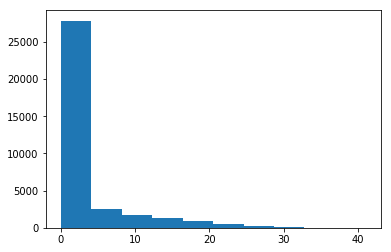

In [57]:
print(total_byHour)
plt.hist(bike_availability_df.total_incoming_outgoing)
plt.show()

The total traffic peaks at 8.00 AM in the morning and around 5.00 PM in the evening.

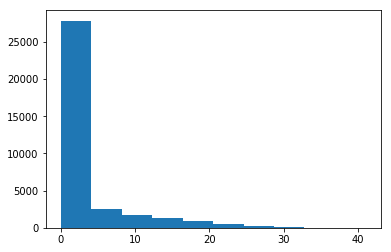

In [58]:
#Is our total(Incoming + outgoing) data normally distributed
plt.hist(bike_availability_df.total_incoming_outgoing)
plt.show()


In [59]:
bike_availability_df.tail()


,station_id,bikes_available,docks_available,outgoing,incoming,replenish,outgoing_24H,incoming_24H,outgoing-incoming-ratio,avg_bikes_available,...,net_incoming_overall_by_hour,net_incoming_overall_by_weekday,net_incoming_traffic_ratio_1,net_incoming_traffic_ratio_2,total_incoming_outgoing,total_incoming_outgoing_24Hr,total_traffic_hourVsDay,index_time_stamp,total_overall_by_hour,total_overall_by_weekday
time,,,,,,,,,,,,,,,,,,,,,
2015-08-31 21:30:00,70.0,13.0,6.0,0.0,1.0,0,1.791667,2.708333,0.661538,11.666667,...,0.113233,0.607462,1.509011,8.831325,1.0,4.500000,0.222222,2015-08-31 21:30:00,0.585266,4.202223
2015-08-31 22:00:00,70.0,13.0,6.0,0.0,0.0,0,1.791667,2.708333,0.661538,12.000000,...,-0.049113,0.607462,1.509011,-0.000000,0.0,4.500000,0.000000,2015-08-31 22:00:00,0.717599,4.202223
2015-08-31 22:30:00,70.0,13.0,6.0,0.0,0.0,0,1.791667,2.708333,0.661538,12.333333,...,0.053206,0.607462,1.509011,0.000000,0.0,4.500000,0.000000,2015-08-31 22:30:00,0.353342,4.202223
2015-08-31 23:00:00,70.0,14.0,5.0,0.0,2.0,0,1.791667,2.750000,0.651515,12.833333,...,0.010914,0.607462,1.577603,183.250000,2.0,4.541667,0.440367,2015-08-31 23:00:00,0.384720,4.202223
2015-08-31 23:30:00,70.0,15.0,4.0,NaN,NaN,0,NaN,NaN,0.000000,13.333333,...,0.094262,0.607462,0.000000,0.000000,NaN,NaN,NaN,2015-08-31 23:30:00,0.239071,4.202223


In [60]:
#Getting the ratio of net_incoming_traffic in the 24 hour window AND the net incoming traffic mean for the specific weekday
bike_availability_df['total_traffic_ratio_1'] = bike_availability_df['total_incoming_outgoing_24Hr']/bike_availability_df['total_overall_by_weekday']
#handling division by zero
bike_availability_df.loc[~np.isfinite(bike_availability_df['total_traffic_ratio_1']), 'total_traffic_ratio_1'] = 0
bike_availability_df['total_traffic_ratio_2'] = bike_availability_df['total_incoming_outgoing']/bike_availability_df['total_overall_by_hour']
#handling division by zero
bike_availability_df.loc[~np.isfinite(bike_availability_df['total_traffic_ratio_2']), 'total_traffic_ratio_2'] = 0

In [61]:
#identifying busy periods
##if avg_bikes_available <=7 then PEAK, if avg_bikes_available >7 and <=14 then moderate, if avg_bikes_available >14 then low

### Data Set for the model


In [62]:
#bike_availability_df.replace([np.inf, -np.inf], np.nan)
#removing rows with NaNs
Model_dataSet = bike_availability_df.dropna()

In [63]:
Model_dataSet.shape

(34946, 27)

In [64]:
Model_dataSet.head(500)

,station_id,bikes_available,docks_available,outgoing,incoming,replenish,outgoing_24H,incoming_24H,outgoing-incoming-ratio,avg_bikes_available,...,net_incoming_traffic_ratio_1,net_incoming_traffic_ratio_2,total_incoming_outgoing,total_incoming_outgoing_24Hr,total_traffic_hourVsDay,index_time_stamp,total_overall_by_hour,total_overall_by_weekday,total_traffic_ratio_1,total_traffic_ratio_2
time,,,,,,,,,,,,,,,,,,,,,
2013-08-30 11:30:00,70.0,0.0,19.0,1.0,0.0,1,0.812500,0.750000,1.083333,1.666667,...,-0.141956,14.938776,1.0,1.562500,0.640000,2013-08-30 11:30:00,1.596995,3.744246,0.417307,0.626176
2013-08-30 12:00:00,70.0,0.0,19.0,0.0,0.0,1,0.812500,0.729167,1.114286,0.833333,...,-0.189274,0.000000,0.0,1.541667,0.000000,2013-08-30 12:00:00,1.073670,3.744246,0.411743,0.000000
2013-08-30 12:30:00,70.0,0.0,19.0,0.0,0.0,0,0.812500,0.729167,1.114286,0.166667,...,-0.189274,0.000000,0.0,1.541667,0.000000,2013-08-30 12:30:00,1.604366,3.744246,0.411743,0.000000
2013-08-30 13:00:00,70.0,0.0,19.0,0.0,1.0,0,0.812500,0.708333,1.147059,0.166667,...,-0.236593,2.451505,1.0,1.520833,0.657534,2013-08-30 13:00:00,1.210095,3.744246,0.406179,0.826381
2013-08-30 13:30:00,70.0,6.0,13.0,1.0,0.0,0,0.812500,0.666667,1.218750,1.166667,...,-0.331230,-6.108333,1.0,1.479167,0.676056,2013-08-30 13:30:00,1.328786,3.744246,0.395051,0.752567
2013-08-30 14:00:00,70.0,7.0,12.0,0.0,1.0,0,0.812500,0.645833,1.258065,2.166667,...,-0.378549,1.625277,1.0,1.458333,0.685714,2013-08-30 14:00:00,1.237381,3.744246,0.389487,0.808159
2013-08-30 14:30:00,70.0,7.0,12.0,0.0,1.0,0,0.791667,0.666667,1.187500,3.333333,...,-0.283912,5.911290,1.0,1.458333,0.685714,2013-08-30 14:30:00,1.369714,3.744246,0.389487,0.730080
2013-08-30 15:00:00,70.0,9.0,10.0,0.0,1.0,0,0.750000,0.583333,1.285714,4.833333,...,-0.378549,0.789871,1.0,1.333333,0.750000,2013-08-30 15:00:00,2.114598,3.744246,0.356102,0.472903
2013-08-30 15:30:00,70.0,9.0,10.0,0.0,1.0,0,0.729167,0.541667,1.346154,6.333333,...,-0.425868,0.276917,1.0,1.270833,0.786885,2013-08-30 15:30:00,4.986357,3.744246,0.339410,0.200547


In [65]:
#X_=Model_dataSet[['station_id', 'bikes_available', 'docks_available', 'outgoing', 'incoming','outgoing_24H', 'incoming_24H'
#                 ,'outgoing-incoming-ratio','avg_bikes_available','net_incoming_traffic', 'net_incoming_traffic_24Hr', 'incoming_traffic',
#                 'day_of_week', 'net_incoming_overall_by_hour', 'net_incoming_overall_by_weekday', 'net_incoming_traffic_ratio_1',
#                 'net_incoming_traffic_ratio_2','replenish']]

X_=Model_dataSet[['station_id', 'bikes_available', 'docks_available', 'outgoing', 'incoming','outgoing_24H','avg_bikes_available','net_incoming_traffic', 'net_incoming_traffic_24Hr',
                 'day_of_week', 'net_incoming_overall_by_hour', 'net_incoming_overall_by_weekday','replenish']]

In [66]:
#Removing index
X_.reset_index(drop=True, inplace=True)
X_.columns

Index(['station_id', 'bikes_available', 'docks_available', 'outgoing',
       'incoming', 'outgoing_24H', 'avg_bikes_available',
       'net_incoming_traffic', 'net_incoming_traffic_24Hr', 'day_of_week',
       'net_incoming_overall_by_hour', 'net_incoming_overall_by_weekday',
       'replenish'],
      dtype='object')

In [67]:
#Changing Data Types
X_[['station_id', 'bikes_available', 'docks_available', 'outgoing',
       'incoming', 'net_incoming_traffic', 'day_of_week']] =  X_[['station_id', 'bikes_available', 'docks_available', 'outgoing',
       'incoming', 'net_incoming_traffic', 'day_of_week']].astype(np.int32)

X_[[ 'outgoing_24H', 'avg_bikes_available',
       'net_incoming_traffic_24Hr',
       'net_incoming_overall_by_hour',
       'net_incoming_overall_by_weekday']] = X_[[ 'outgoing_24H', 'avg_bikes_available',
       'net_incoming_traffic_24Hr',
       'net_incoming_overall_by_hour',
       'net_incoming_overall_by_weekday']].astype(np.float32)

X_[['replenish']] = X_[['replenish']].astype(np.int32)
X_.dtypes

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


station_id                           int32
bikes_available                      int32
docks_available                      int32
outgoing                             int32
incoming                             int32
outgoing_24H                       float32
avg_bikes_available                float32
net_incoming_traffic                 int32
net_incoming_traffic_24Hr          float32
day_of_week                          int32
net_incoming_overall_by_hour       float32
net_incoming_overall_by_weekday    float32
replenish                            int32
dtype: object

In [68]:
#Including additional parameters


In [69]:
#Rounding off values for simplicity
X_=X_.round(2)

In [70]:
X = np.array(X_.drop(['replenish'],1))
y=np.array(X_['replenish'])

In [71]:
print(X)

[[ 7.00000000e+01  0.00000000e+00  1.90000000e+01 ...  4.00000000e+00
  -7.00000003e-02  4.39999998e-01]
 [ 7.00000000e+01  0.00000000e+00  1.90000000e+01 ...  4.00000000e+00
   9.00000036e-02  4.39999998e-01]
 [ 7.00000000e+01  0.00000000e+00  1.90000000e+01 ...  4.00000000e+00
   1.89999998e-01  4.39999998e-01]
 ...
 [ 7.00000000e+01  1.30000000e+01  6.00000000e+00 ...  0.00000000e+00
  -5.00000007e-02  6.10000014e-01]
 [ 7.00000000e+01  1.30000000e+01  6.00000000e+00 ...  0.00000000e+00
   5.00000007e-02  6.10000014e-01]
 [ 7.00000000e+01  1.40000000e+01  5.00000000e+00 ...  0.00000000e+00
   9.99999978e-03  6.10000014e-01]]


In [72]:
#Checking for divisions by zero
np.where(np.isinf(X))

(array([], dtype=int64), array([], dtype=int64))

In [73]:
#Splitting between training and testing data sets
X_Train,X_Test, y_Train,y_Test = train_test_split(X,y,test_size = 0.3)
X_Train = X_Train.astype(np.float32)
print(X_Train)
print(y_Train)

[[ 7.00e+01  1.30e+01  6.00e+00 ...  6.00e+00  6.75e+00  2.00e-02]
 [ 7.00e+01  1.70e+01  2.00e+00 ...  6.00e+00 -2.80e-01  2.00e-02]
 [ 7.00e+01  8.00e+00  1.10e+01 ...  5.00e+00  1.27e+00  3.00e-02]
 ...
 [ 7.00e+01  1.00e+01  9.00e+00 ...  6.00e+00  6.75e+00  2.00e-02]
 [ 7.00e+01  1.30e+01  6.00e+00 ...  4.00e+00  1.00e-02  4.40e-01]
 [ 7.00e+01  1.30e+01  6.00e+00 ...  4.00e+00 -6.10e-01  4.40e-01]]
[0 0 0 ... 0 0 0]


#### Decision Trees Classifier

In [74]:
param_grid_dt = {'min_samples_split':[10,100,1000,10000], 'max_depth':[10,100,150,200,250]}
dt = DecisionTreeClassifier(class_weight = 'balanced')

dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring = 'accuracy')

dt_cv.fit(X_Train, y_Train)

print('Best Scores (Accuracy): ',dt_cv.best_score_)
print('Best Parameters: ',dt_cv.best_params_)

Best Scores (Accuracy):  0.883819802142098
Best Parameters:  {'max_depth': 250, 'min_samples_split': 10}


In [75]:
y_predicted_dt = dt_cv.predict(X_Test)
print('Decision Trees - accuracy score: ',(accuracy_score(y_Test, y_predicted_dt)))

dt_matrix = confusion_matrix(y_Test, y_predicted_dt)
dt_classification = classification_report(y_Test, y_predicted_dt)

print(dt_classification)
print(dt_matrix)

tn, fp, fn, tp = dt_matrix.ravel()
print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

Decision Trees - accuracy score:  0.8831552842426554
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      9398
           1       0.45      0.64      0.53      1086

   micro avg       0.88      0.88      0.88     10484
   macro avg       0.71      0.77      0.73     10484
weighted avg       0.90      0.88      0.89     10484

[[8567  831]
 [ 394  692]]
True Negative (0 as 0):  8567
False Positive (0 as 1) (Minimize):  831
False Negative (1 as 0) (Minimize):  394
True Positive (1 as 1) :  692


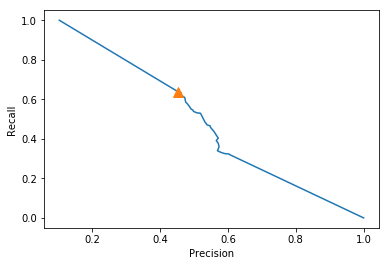

In [76]:
dt_probability = dt_cv.predict_proba(X_Test)
dt_probability_default = dt_probability[:,1]

precision_dt, recall_dt, threshold_dt = precision_recall_curve(y_Test,dt_probability_default)

plt.plot(precision_dt, recall_dt,label = 'Decision Tree')

close_default_dt = np.argmin(np.abs(threshold_dt - 0.5))

plt.plot(precision_dt[close_default_dt], recall_dt[close_default_dt], '^', markersize=10, label = 'threshold 0.5')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

#### kNN Classifier

In [77]:
param_grid_knn = {'n_neighbors':[20,30,40,50,60,70,80,90,100]}
knn = KNeighborsClassifier(weights='distance')

knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, scoring = 'accuracy')

knn_cv.fit(X_Train, y_Train)

#print('Grid Scores: ',knn_cv.grid_scores_)
print('Best Scores (Accuracy): ',knn_cv.best_score_)
print('Best Parameters: ',knn_cv.best_params_)

Best Scores (Accuracy):  0.9170550241190418
Best Parameters:  {'n_neighbors': 100}


In [78]:
y_predicted_knn = knn_cv.predict(X_Test)
print('KNN - accuracy score: ',(accuracy_score(y_Test, y_predicted_knn)))

knn_matrix = confusion_matrix(y_Test, y_predicted_knn)
knn_classification = classification_report(y_Test, y_predicted_knn)

print(knn_classification)
print(knn_matrix)

tn, fp, fn, tp = confusion_matrix(y_Test, y_predicted_knn).ravel()
print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

KNN - accuracy score:  0.9218809614650897
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      9398
           1       0.64      0.55      0.59      1086

   micro avg       0.92      0.92      0.92     10484
   macro avg       0.80      0.76      0.78     10484
weighted avg       0.92      0.92      0.92     10484

[[9064  334]
 [ 485  601]]
True Negative (0 as 0):  9064
False Positive (0 as 1) (Minimize):  334
False Negative (1 as 0) (Minimize):  485
True Positive (1 as 1) :  601


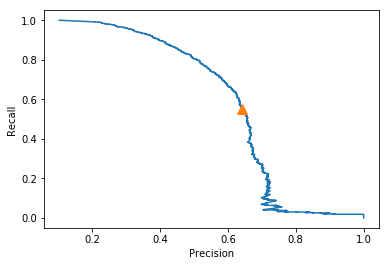

In [79]:
knn_probability = knn_cv.predict_proba(X_Test)
knn_probability_default = knn_probability[:,1]

precision_knn, recall_knn, threshold_knn = precision_recall_curve(y_Test,knn_probability_default)

plt.plot(precision_knn, recall_knn,label = 'kNN')
#default threshold is 0.5 - marking the point on the curve
close_default_knn = np.argmin(np.abs(threshold_knn - 0.5))

plt.plot(precision_knn[close_default_knn], recall_knn[close_default_knn], '^', markersize=10, label = 'threshold 0.5')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

#### Random Forest

In [80]:
param_grid_rf = {'n_estimators': [1,5,10,100,200],
              'min_samples_split': [10,100,1000, 10000],
              'max_depth':[10,100,200,250,300]}
rf = RandomForestClassifier(class_weight='balanced')

rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring = 'accuracy')

rf_cv.fit(X_Train, y_Train)

print('Best Scores (Accuracy): ',rf_cv.best_score_)
print('Best Parameters: ',rf_cv.best_params_)

Best Scores (Accuracy):  0.9144796010138173
Best Parameters:  {'max_depth': 200, 'min_samples_split': 10, 'n_estimators': 100}


In [81]:
y_predicted_rf = rf_cv.predict(X_Test)
print('Random Forest - accuracy score: ',(accuracy_score(y_Test, y_predicted_rf)))

rf_matrix = confusion_matrix(y_Test, y_predicted_rf)
rf_classification = classification_report(y_Test, y_predicted_rf)

print(rf_classification)
print(rf_matrix)

tn, fp, fn, tp = rf_matrix.ravel()
print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

Random Forest - accuracy score:  0.9194009919877909
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      9398
           1       0.59      0.75      0.66      1086

   micro avg       0.92      0.92      0.92     10484
   macro avg       0.78      0.85      0.81     10484
weighted avg       0.93      0.92      0.92     10484

[[8823  575]
 [ 270  816]]
True Negative (0 as 0):  8823
False Positive (0 as 1) (Minimize):  575
False Negative (1 as 0) (Minimize):  270
True Positive (1 as 1) :  816


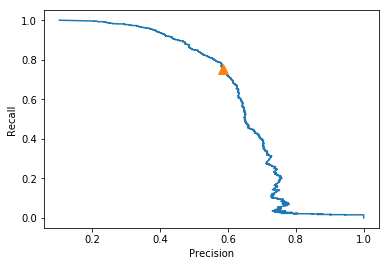

In [82]:
rf_probability = rf_cv.predict_proba(X_Test)
rf_probability_default = rf_probability[:,1]

precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_Test,rf_probability_default)

plt.plot(precision_rf, recall_rf,label = 'Random Forest')

close_default_rf = np.argmin(np.abs(threshold_rf - 0.5))

plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label = 'threshold 0.5')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

#### Including additional features and running again

In [83]:
#### Additional features

X_=Model_dataSet[['station_id', 'bikes_available', 'docks_available', 'outgoing',
       'incoming',  'outgoing_24H', 'incoming_24H',
       'outgoing-incoming-ratio', 'avg_bikes_available',
       'net_incoming_traffic', 'net_incoming_traffic_24Hr',
       'incoming_traffic_hourVsDay', 'day_of_week',
       'net_incoming_overall_by_hour', 'net_incoming_overall_by_weekday',
       'net_incoming_traffic_ratio_1', 'net_incoming_traffic_ratio_2',
       'total_incoming_outgoing', 'total_incoming_outgoing_24Hr',
       'total_traffic_hourVsDay', 'total_overall_by_hour',
       'total_overall_by_weekday','total_traffic_ratio_1', 'total_traffic_ratio_2','replenish',]]

In [84]:
len(Model_dataSet.columns)

27

In [85]:
X_.reset_index(drop=True, inplace=True)
X_.columns

Index(['station_id', 'bikes_available', 'docks_available', 'outgoing',
       'incoming', 'outgoing_24H', 'incoming_24H', 'outgoing-incoming-ratio',
       'avg_bikes_available', 'net_incoming_traffic',
       'net_incoming_traffic_24Hr', 'incoming_traffic_hourVsDay',
       'day_of_week', 'net_incoming_overall_by_hour',
       'net_incoming_overall_by_weekday', 'net_incoming_traffic_ratio_1',
       'net_incoming_traffic_ratio_2', 'total_incoming_outgoing',
       'total_incoming_outgoing_24Hr', 'total_traffic_hourVsDay',
       'total_overall_by_hour', 'total_overall_by_weekday',
       'total_traffic_ratio_1', 'total_traffic_ratio_2', 'replenish'],
      dtype='object')

In [86]:
X_=X_.round(2)
X = np.array(X_.drop(['replenish'],1))
y=np.array(X_['replenish'])

In [87]:
X.shape

(34946, 24)

In [88]:
#Checking for divisions by zero
np.where(np.isinf(X))

(array([], dtype=int64), array([], dtype=int64))

In [89]:
#Splitting between training and testing data sets
X_Train,X_Test, y_Train,y_Test = train_test_split(X,y,test_size = 0.3)
X_Train = X_Train.astype(np.float32)
print(X_Train)
print(y_Train)

[[70.   14.    5.   ...  4.2   0.37  1.2 ]
 [70.    7.   12.   ...  4.24  1.4   1.27]
 [70.   11.    8.   ...  4.47  0.91  1.62]
 ...
 [70.   13.    6.   ...  4.44  1.08  0.  ]
 [70.   15.    4.   ...  4.47  1.17  0.  ]
 [70.    9.   10.   ...  0.64  5.16  0.  ]]
[0 1 0 ... 0 0 0]


#### Decision Tree Classifier

In [90]:
param_grid_dt = {'min_samples_split':[10,100,1000,10000], 'max_depth':[10,100,150,200,250]}
dt = DecisionTreeClassifier(class_weight = 'balanced')

dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring = 'accuracy')

dt_cv.fit(X_Train, y_Train)

print('Best Scores (Accuracy): ',dt_cv.best_score_)
print('Best Parameters: ',dt_cv.best_params_)

Best Scores (Accuracy):  0.8882756929114545
Best Parameters:  {'max_depth': 200, 'min_samples_split': 10}


In [91]:
y_predicted_dt = dt_cv.predict(X_Test)
print('Decision Trees - accuracy score: ',(accuracy_score(y_Test, y_predicted_dt)))

dt_matrix = confusion_matrix(y_Test, y_predicted_dt)
dt_classification = classification_report(y_Test, y_predicted_dt)

print(dt_classification)
print(dt_matrix)

tn, fp, fn, tp = dt_matrix.ravel()
print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

Decision Trees - accuracy score:  0.8908813429988554
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9388
           1       0.48      0.59      0.53      1096

   micro avg       0.89      0.89      0.89     10484
   macro avg       0.72      0.76      0.73     10484
weighted avg       0.90      0.89      0.90     10484

[[8694  694]
 [ 450  646]]
True Negative (0 as 0):  8694
False Positive (0 as 1) (Minimize):  694
False Negative (1 as 0) (Minimize):  450
True Positive (1 as 1) :  646


As compared to the original feature set, adding the new features improves the performance of out model slightly. 

<b> With initial, limited features </b>
- Accuracy:88%
- True Negative (0 as 0):  8495
- False Positive (0 as 1) (Minimize):  870
- False Negative (1 as 0) (Minimize):  393
- True Positive (1 as 1) :  726

<b> With new, additional features </b>
- Accuracy:89%
- True Negative (0 as 0):  8643
- False Positive (0 as 1) (Minimize):  732 (Slight improvement)
- False Negative (1 as 0) (Minimize):  420 (Slight  deterioration)
- True Positive (1 as 1) :  689

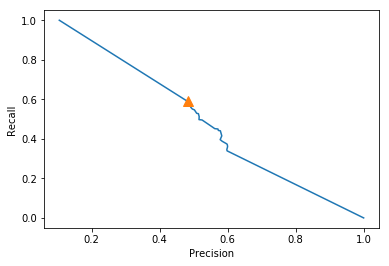

In [92]:
dt_probability = dt_cv.predict_proba(X_Test)
dt_probability_default = dt_probability[:,1]

precision_dt, recall_dt, threshold_dt = precision_recall_curve(y_Test,dt_probability_default)

plt.plot(precision_dt, recall_dt,label = 'Decision Tree')

close_default_dt = np.argmin(np.abs(threshold_dt - 0.5))

plt.plot(precision_dt[close_default_dt], recall_dt[close_default_dt], '^', markersize=10, label = 'threshold 0.5')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

#### kNN Classifier

In [93]:
param_grid_knn = {'n_neighbors':[20,30,40,50,60,70,80,90,100]}
knn = KNeighborsClassifier(weights='distance')

knn_cv = GridSearchCV(knn, param_grid_knn, cv=5, scoring = 'accuracy')

knn_cv.fit(X_Train, y_Train)

#print('Grid Scores: ',knn_cv.grid_scores_)
print('Best Scores (Accuracy): ',knn_cv.best_score_)
print('Best Parameters: ',knn_cv.best_params_)

Best Scores (Accuracy):  0.9157468727005151
Best Parameters:  {'n_neighbors': 30}


In [94]:
y_predicted_knn = knn_cv.predict(X_Test)
print('KNN - accuracy score: ',(accuracy_score(y_Test, y_predicted_knn)))

knn_matrix = confusion_matrix(y_Test, y_predicted_knn)
knn_classification = classification_report(y_Test, y_predicted_knn)

print(knn_classification)
print(knn_matrix)

tn, fp, fn, tp = confusion_matrix(y_Test, y_predicted_knn).ravel()
print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

KNN - accuracy score:  0.9176840900419687
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9388
           1       0.64      0.49      0.56      1096

   micro avg       0.92      0.92      0.92     10484
   macro avg       0.79      0.73      0.76     10484
weighted avg       0.91      0.92      0.91     10484

[[9080  308]
 [ 555  541]]
True Negative (0 as 0):  9080
False Positive (0 as 1) (Minimize):  308
False Negative (1 as 0) (Minimize):  555
True Positive (1 as 1) :  541


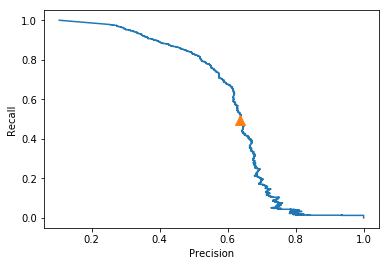

In [95]:
knn_probability = knn_cv.predict_proba(X_Test)
knn_probability_default = knn_probability[:,1]

precision_knn, recall_knn, threshold_knn = precision_recall_curve(y_Test,knn_probability_default)

plt.plot(precision_knn, recall_knn,label = 'kNN')
#default threshold is 0.5 - marking the point on the curve
close_default_knn = np.argmin(np.abs(threshold_knn - 0.5))

plt.plot(precision_knn[close_default_knn], recall_knn[close_default_knn], '^', markersize=10, label = 'threshold 0.5')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

#### Random Forest Classifier

In [96]:
param_grid_rf = {'n_estimators': [1,5,10,100,200],
              'min_samples_split': [10,100,1000, 10000],
              'max_depth':[10,100,200,250,300]}
rf = RandomForestClassifier(class_weight='balanced')

rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring = 'accuracy')

rf_cv.fit(X_Train, y_Train)

print('Best Scores (Accuracy): ',rf_cv.best_score_)
print('Best Parameters: ',rf_cv.best_params_)

Best Scores (Accuracy):  0.9185675741967133
Best Parameters:  {'max_depth': 250, 'min_samples_split': 10, 'n_estimators': 100}


In [97]:
y_predicted_rf = rf_cv.predict(X_Test)
print('Random Forest - accuracy score: ',(accuracy_score(y_Test, y_predicted_rf)))

rf_matrix = confusion_matrix(y_Test, y_predicted_rf)
rf_classification = classification_report(y_Test, y_predicted_rf)

print(rf_classification)
print(rf_matrix)

tn, fp, fn, tp = rf_matrix.ravel()
print("True Negative (0 as 0): ", tn)
print("False Positive (0 as 1) (Minimize): ", fp)
print("False Negative (1 as 0) (Minimize): ", fn)
print("True Positive (1 as 1) : ", tp)

Random Forest - accuracy score:  0.9192102251049218
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9388
           1       0.60      0.69      0.64      1096

   micro avg       0.92      0.92      0.92     10484
   macro avg       0.78      0.82      0.80     10484
weighted avg       0.93      0.92      0.92     10484

[[8881  507]
 [ 340  756]]
True Negative (0 as 0):  8881
False Positive (0 as 1) (Minimize):  507
False Negative (1 as 0) (Minimize):  340
True Positive (1 as 1) :  756


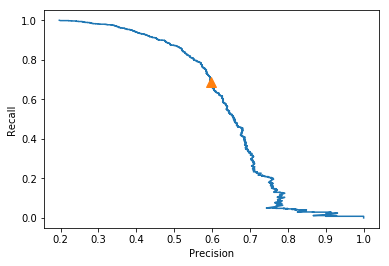

In [98]:
rf_probability = rf_cv.predict_proba(X_Test)
rf_probability_default = rf_probability[:,1]

precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_Test,rf_probability_default)

plt.plot(precision_rf, recall_rf,label = 'Random Forest')

close_default_rf = np.argmin(np.abs(threshold_rf - 0.5))

plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label = 'threshold 0.5')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [99]:
rf.fit(X_Train, y_Train)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

#### Feature Importance

In [100]:
Index = ['station_id', 'bikes_available', 'docks_available', 'outgoing',
       'incoming', 'outgoing_24H', 'incoming_24H',
       'outgoing-incoming-ratio', 'avg_bikes_available',
       'net_incoming_traffic', 'net_incoming_traffic_24Hr',
       'incoming_traffic_hourVsDay', 'day_of_week', 'net_incoming_overall_by_hour', 'net_incoming_overall_by_weekday',
       'net_incoming_traffic_ratio_1', 'net_incoming_traffic_ratio_2',
       'total_incoming_outgoing', 'total_incoming_outgoing_24Hr',
       'total_traffic_hourVsDay', 'total_overall_by_hour',
       'total_overall_by_weekday','total_traffic_ratio_1', 
        'total_traffic_ratio_2']
      
feature_importances = pd.DataFrame(rf.feature_importances_, index = Index, columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

,importance
bikes_available,0.206774
net_incoming_overall_by_hour,0.097381
docks_available,0.086899
total_traffic_hourVsDay,0.064054
total_overall_by_hour,0.061097
avg_bikes_available,0.049139
outgoing,0.047249
total_incoming_outgoing,0.039330
net_incoming_traffic,0.035797
day_of_week,0.031748


Based on the feature importances here, adding a few more features and dropping the last three, we can run the model again to re-measure performance. 

### Model Performance

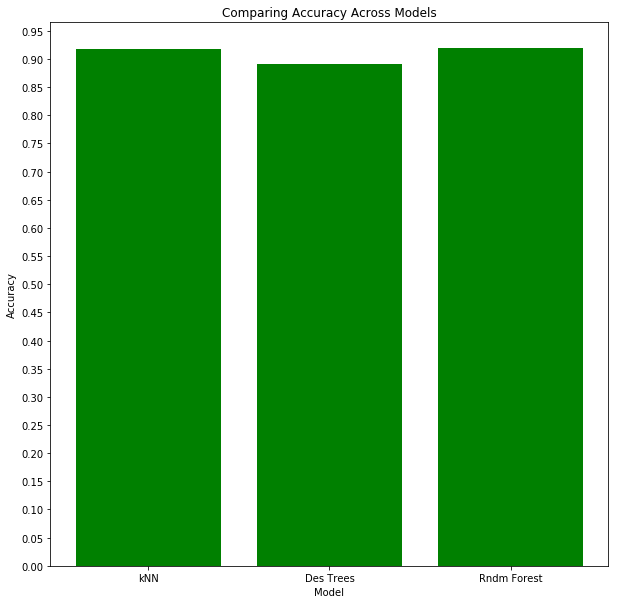

In [101]:
accuracy = [(accuracy_score(y_Test, y_predicted_knn)),  (accuracy_score(y_Test, y_predicted_dt)), (accuracy_score(y_Test, y_predicted_rf))]
# Plotting accuracy for each model
N = np.arange(3)
plt.figure(figsize=(10,10))
plt.title('Comparing Accuracy Across Models')
plt.bar(N, accuracy, color = 'green')
plt.xticks(N,('kNN', 'Des Trees', 'Rndm Forest'))
plt.yticks(np.arange(0,1,0.05))
#plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

<b>ROC Curve</b>
A visual way to evaluate the performance of your model. The ROC curve visually shows what happens when we change the probability threshold. To compare models, a model with the maximum area underneath its ROC curve will be better.

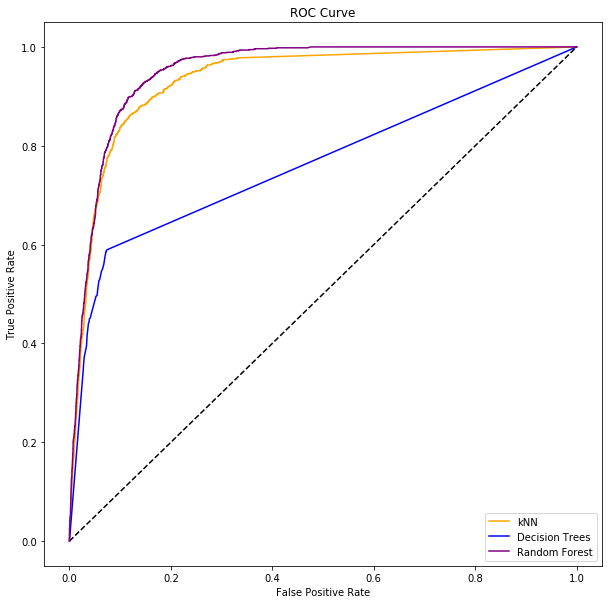

In [102]:
fpr_kNN, tpr_kNN, thresholds_kNN = roc_curve(y_Test, knn_probability_default)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_Test, dt_probability_default)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_Test, rf_probability_default)
plt.figure(figsize=(10,10))
plt.plot([0,1], [0,1], 'k--')

knnPlt = plt.plot(fpr_kNN, tpr_kNN, color='orange', label='kNN')
dtPlt = plt.plot(fpr_dt, tpr_dt, color='b', label = 'Decision Trees')
rfPlt = plt.plot(fpr_rf, tpr_rf, color='purple', label = 'Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
#plt.legend([logregPlt, knnPlt, dtPlt, rfPlt], ['Log Reg', 'kNN', 'Decision Tree', 'Random Forest'])
plt.title('ROC Curve')
plt.show()

The ROC curves suggest that kNN and Random Forests are perhaps the best performing models as thier curves are pretty similar to each other. Decision Trees has a flatter curve and is perhaps the poorest performer of all models. 

Interestingly, it has a better accuracy then the logistic regression model.

Random Forest has the best ROC curve covering the most area. Our Random forest model also has the best accuracy making it perhaps the best candidate for this scenario.